<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [76]:
#Start Here

import pandas as pd
import numpy as np
import re
import os
import spacy
import gensim
import en_core_web_lg
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim
import seaborn as sns
import matplotlib.pyplot as plt

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df = pd.read_csv('/Users/matthewdmeans/unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [4]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [16]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'tokens'],
      dtype='object')

In [17]:
df['reviews.text'][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

In [18]:
nlp = spacy.load('en_core_web_lg')

In [21]:
stop_words = nlp.Defaults.stop_words

def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        conditions = (token.is_stop == False) & (token.is_punct == False) & (token.pos_ !='PRON') & (token is not stop_words)
        if conditions:
            lemmas.append(token.lemma_)
            
    return lemmas

In [22]:
df['reviews.text'] = df['reviews.text'].apply(get_lemmas)

In [24]:
# make topic model

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
id2word = corpora.Dictionary(df['reviews.text'])

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
id2word.filter_extremes(no_below=20, no_above=0.85)

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
len(id2word.keys())

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


789

In [50]:
corpus = [id2word.doc2bow(doc) for doc in df['reviews.text']]

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
lda = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    passes=100,
    workers=12,
    random_state=42
)

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
lda.print_topics()

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.108*"kid" + 0.061*"tablet" + 0.044*"great" + 0.039*"love" + 0.037*"child" + 0.024*"easy" + 0.022*"set" + 0.021*"time" + 0.021*"control" + 0.020*"case"'),
 (1,
  '0.101*"year" + 0.101*"old" + 0.044*"love" + 0.040*"buy" + 0.036*"2" + 0.025*"3" + 0.020*"4" + 0.020*"tablet" + 0.018*"5" + 0.016*"charge"'),
 (2,
  '0.028*"tablet" + 0.027*"good" + 0.025*"buy" + 0.022*"device" + 0.020*"store" + 0.020*"Amazon" + 0.018*"purchase" + 0.015*"day" + 0.014*"find" + 0.014*"sale"'),
 (3,
  '0.173*"great" + 0.150*"good" + 0.134*"price" + 0.068*"product" + 0.065*"work" + 0.042*"battery" + 0.030*"value" + 0.028*"buy" + 0.022*"deal" + 0.021*"quality"'),
 (4,
  '0.056*"game" + 0.043*"tablet" + 0.041*"app" + 0.035*"play" + 0.033*"watch" + 0.029*"movie" + 0.029*"great" + 0.027*"book" + 0.025*"video" + 0.024*"download"'),
 (5,
  '0.126*"battery" + 0.039*"long" + 0.028*"brand" + 0.026*"work" + 0.020*"Amazon" + 0.019*"buy" + 0.016*"time" + 0.015*"life" + 0.013*"use" + 0.013*"like"'),
 (6,
  '0.050*"Fir

In [53]:
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
topics = [' '.join(t[0:5]) for t in words]

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
kid tablet great love child

------ Topic 1 ------
year old love buy 2

------ Topic 2 ------
tablet good buy device store

------ Topic 3 ------
great good price product work

------ Topic 4 ------
game tablet app play watch

------ Topic 5 ------
battery long brand work Amazon

------ Topic 6 ------
Fire fire great tablet Kindle

------ Topic 7 ------
easy read use book Kindle

------ Topic 8 ------
tablet price good iPad Amazon

------ Topic 9 ------
love buy gift use Christmas



/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
pyLDAvis.enable_notebook()

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.168326  0.174708       1        1  21.734620
3     -0.323065  0.026920       2        1  10.708605
7      0.107292 -0.139202       3        1   9.963705
4      0.079542 -0.124548       4        1   9.482051
8     -0.156531 -0.088564       5        1   9.101377
0      0.141245 -0.031344       6        1   9.085676
1      0.183610  0.186070       7        1   8.214658
2     -0.037254  0.102540       8        1   7.829765
6     -0.024954 -0.198379       9        1   6.964029
9      0.198442  0.091799      10        1   6.915514, topic_info=          Term         Freq        Total Category  logprob  loglift
2      battery  8945.000000  8945.000000  Default  30.0000  30.0000
15       price  4913.000000  4913.000000  Default  29.0000  29.0000
72        love  6164.000000  6164.000000  Default  28.0000  28.0000
18       great  9246.000000  9246.000000  Default  27.0000  27.0000
28        good  6821.000000  6821.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
669     kindle   281.540926  1507.113881  Topic10  -4.2378   0.9937
18       great   441.740331  9246.573731  Topic10  -3.7874  -0.3699
119       give   126.885979   426.311796  Topic10  -5.0348   1.4595
125  recommend   152.125417  1258.516336  Topic10  -4.8534   0.5584
76        want   143.294591  1284.346672  Topic10  -4.9132   0.4783

[565 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
746       5  0.692260        $
746       8  0.250107        $
746       9  0.055827        $
253       1  0.171431        1
253       3  0.020906        1
...     ...       ...      ...
82        7  0.999741     year
479       6  0.886755    young
479       7  0.109379    young
769       4  0.991873  youtube
543       7  0.995176       yr

[1282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 8, 5, 9, 1, 2, 3, 7, 10])

In [67]:
doc_topics = [lda[doc] for doc in corpus]

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
doc_topics[0]

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.01111195),
 (1, 0.011119223),
 (2, 0.011118282),
 (3, 0.01111657),
 (4, 0.011112089),
 (5, 0.8999695),
 (6, 0.011113506),
 (7, 0.011111982),
 (8, 0.011113774),
 (9, 0.011113043)]

In [70]:
def update(doc):
    d_dist = {k:0 for k in range(0,10)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in doc_topics]

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
dft = pd.DataFrame.from_records(new_distro)
dft.columns = topics

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
dft.head()

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,kid tablet great love child,year old love buy 2,tablet good buy device store,great good price product work,game tablet app play watch,battery long brand work Amazon,Fire fire great tablet Kindle,easy read use book Kindle,tablet price good iPad Amazon,love buy gift use Christmas
0,0.011112,0.011119,0.011118,0.011117,0.011112,0.899970,0.011114,0.011112,0.011114,0.011113
1,0.016670,0.016668,0.016671,0.195267,0.016668,0.671373,0.016669,0.016671,0.016674,0.016668
2,0.025002,0.025003,0.025004,0.331384,0.025001,0.313282,0.025003,0.025003,0.025005,0.180314
3,0.016667,0.016667,0.016667,0.458149,0.016667,0.408506,0.016673,0.016667,0.016670,0.016667
4,0.016667,0.016667,0.016667,0.406939,0.016667,0.459723,0.016667,0.016667,0.016668,0.016667


In [73]:
df['primary_topic'] = dft.idxmax(axis=1)

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df.head()

/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,"[order, 3, item, bad, quality, miss, backup, s...",... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, item, bad, quality, missing, backup, s...",battery long brand work Amazon
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,"[bulk, expensive, way, product, like]",... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]",battery long brand work Amazon
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,"[Duracell, price, happy]",... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]",great good price product work
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,"[work, brand, battery, well, price]",... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, batteries, better, price]",great good price product work
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,"[battery, long, last, price, great]",... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[batteries, long, lasting, price, great]",battery long brand work Amazon


/Users/matthewdmeans/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'battery long brand work Amazon'),
  Text(1, 0, 'great good price product work'),
  Text(2, 0, 'tablet price good iPad Amazon'),
  Text(3, 0, 'easy read use book Kindle'),
  Text(4, 0, 'year old love buy 2'),
  Text(5, 0, 'kid tablet great love child'),
  Text(6, 0, 'tablet good buy device store'),
  Text(7, 0, 'love buy gift use Christmas'),
  Text(8, 0, 'Fire fire great tablet Kindle'),
  Text(9, 0, 'game tablet app play watch')])

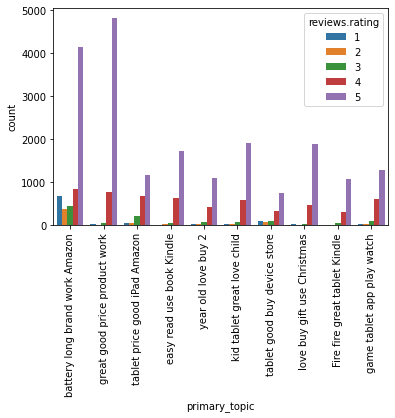

In [77]:
ax = sns.countplot(x='primary_topic', hue='reviews.rating', data=df)
plt.xticks(rotation=90)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling